# Data Science Pipeline Tutorial

## Introduction

Welcome to our Data Science Tutorial! This tutorial walks you through the Data Science pipeline of data curation, parsing and management, expoloratory data analysis, hypothesis testing, and machine learning. The data that we used in this tutorial is Freddie Mac's Single Family Loan-Level data set. We chose this data set because it gives us a large number of records while also giving us the opportunity to walk through the entire pipeline. I hope you enjoy the tutorial!

## Set Up

Below are packages that we will be using for this tutorial. The clean_data module has functions that allow for us to tidy our data set and split it into a train and test set for the machine learning portion of this tutorial 

In [17]:
import pandas as pd
from clean_data import *
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
import re
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import numpy as np
plt.style.use('seaborn')

## Loading the Data

All actionable tasks require data so let us start by getting the data. We will be using pandas to read in the CSV(comma-separated values) file.

We will give pandas the path to the data, the loan sequence number(unique id), and that we want pandas to parse the data for us.

1. Path: 'data/loan_level_500k.csv'
2. Index of the unique id: 19
3. Pandas should load the data with parsing: False

In [3]:
df = pd.read_csv("data/loan_level_500k.csv",
                  index_col=19,
                  low_memory=False)
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,WV,SF,26100.0,P,320,2.0,Other sellers,Other servicers,True,False
F199Q1000005,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,OH,SF,45200.0,N,360,1.0,Other sellers,Other servicers,True,False
F199Q1000007,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,OH,SF,44700.0,P,319,1.0,Other sellers,Other servicers,True,False
F199Q1000013,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,AZ,SF,85200.0,N,318,2.0,Other sellers,Other servicers,True,False
F199Q1000015,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,OH,SF,44200.0,N,317,2.0,Other sellers,Other servicers,True,False


Pandas has now loaded all our data into a dataframe. A dataframe is a 2 dimensional labeled data structure with columns. You can think of like a spreadsheet or a SQL table. Unfortunately, not all the data is in a format that we can make sensable calculations on. For example, the columns that contain dates like ```FIRST_PAYMENT_DATE``` AND ```MATURITY_DATE``` are in proper date time format. To conduct any meaninful analysis on this data we need to fix that.

## Tidy Data

### Improper Types

In [4]:
df[["MATURITY_DATE","FIRST_PAYMENT_DATE"]].head()

,MATURITY_DATE,FIRST_PAYMENT_DATE
LOAN_SEQUENCE_NUMBER,,
F199Q1000004,202901,200206
F199Q1000005,202903,199904
F199Q1000007,202902,200208
F199Q1000013,202902,200209
F199Q1000015,202902,200210


The dates seem to grouped in two blocks of number `[YEAR][MN]`. We can try many methods. However, since the data is numerical and we need to convert them to dates to ideally maintain it. Let us try mod and integer division to separate them. We can get the year by performing on the <em>DATE</em> integer divsion by <em>100</em> and we can get the month by take on the <em>DATE</em> mod <em>100</em>.

The tidy_data function is from our clean_data module. The function will do exaclty what we talked about above; it will split both of the date columns into two: one for the year and one for the month

In [6]:
df =  tidy_data(df)
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,MATURITY_YEAR,MATURITY_MON,FIRST_PAYMENT_YEAR,FIRST_PAYMENT_MON
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,N,NaN,0.0,1.0,O,80.0,33.0,162000,80.0,...,320,2.0,Other sellers,Other servicers,True,0,2029,1,2002,6
F199Q1000005,732.0,N,17140.0,0.0,1.0,O,25.0,10.0,53000,25.0,...,360,1.0,Other sellers,Other servicers,True,0,2029,3,1999,4
F199Q1000007,679.0,N,15940.0,30.0,1.0,O,91.0,48.0,133000,91.0,...,319,1.0,Other sellers,Other servicers,True,0,2029,2,2002,8
F199Q1000013,721.0,N,38060.0,0.0,1.0,O,39.0,13.0,174000,39.0,...,318,2.0,Other sellers,Other servicers,True,0,2029,2,2002,9
F199Q1000015,618.0,N,10420.0,25.0,1.0,O,85.0,24.0,122000,85.0,...,317,2.0,Other sellers,Other servicers,True,0,2029,2,2002,10


### Missing Data

Earlier we split the date columns into two in order to make the data set clean. However, that was only the first part. The data sets still contains many missing values (```NaN's```) which can cause problems later on during our analysis. There are three methods that can be used to deal with missing data: remove missing data, encode the missing data, or impute the missing data. In our example, we will impute the data with either the mean, median or mode.

Let us do some priliminary checks first.

We will be checking for ...

1. How much data are we missing?
2. Which columns have missing values?
3. Is there a pattern to missing values?

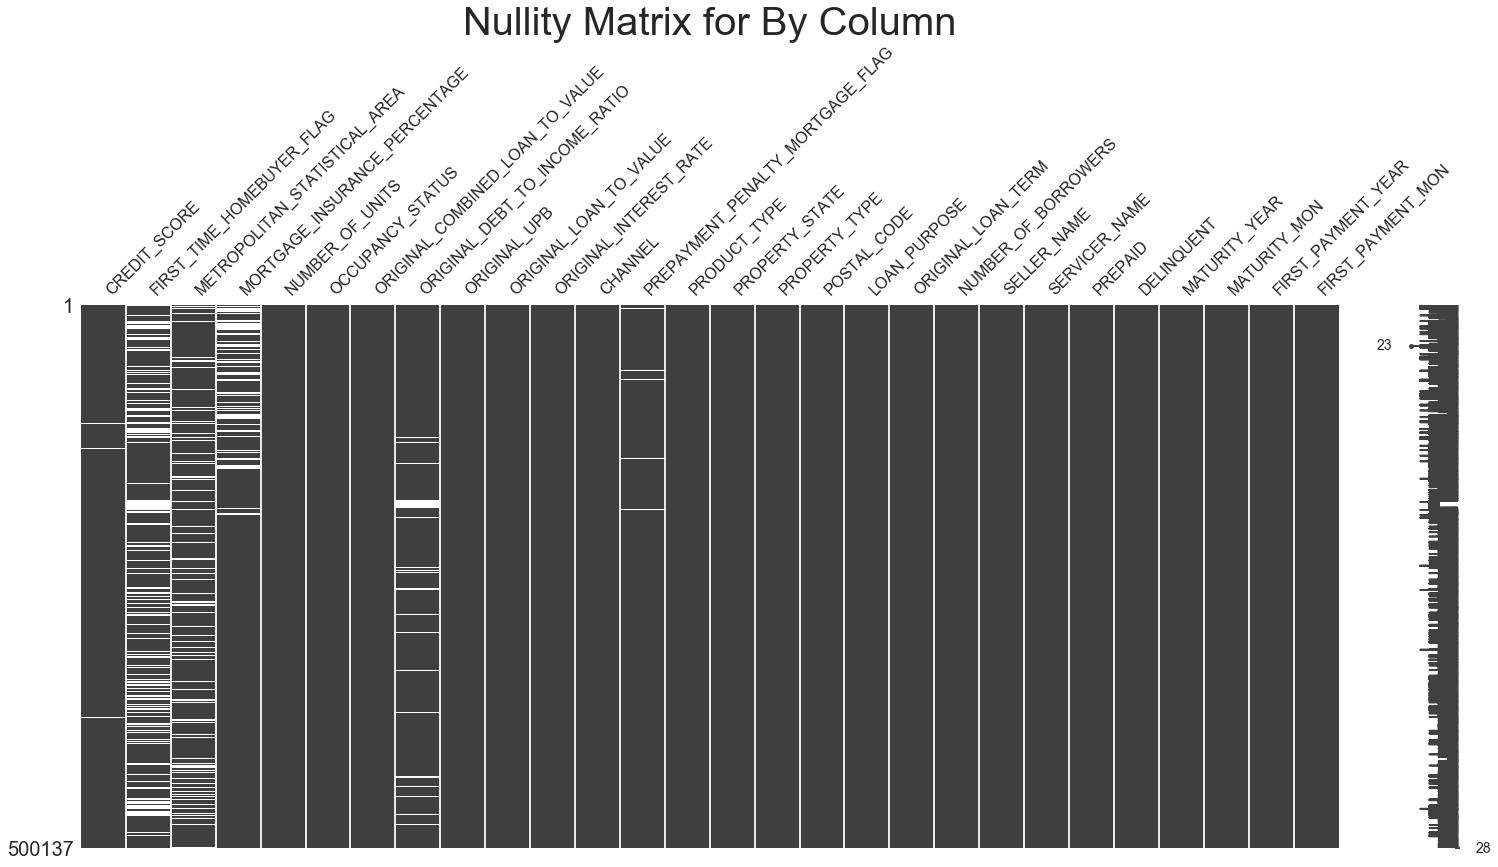

In [7]:
g = msno.matrix(df)
g.axes.set_title("Nullity Matrix for By Column",fontsize=40);

This figure show that:

- `CREDIT_SCORE`, `FIRST_TIME_HOMEBUYER_FLAG`, `METROPOLITAN_STATISTICAL_AREA`, `MORTGAGE_INSURANCE_PERCENTAGE`,  `ORIGINAL_DEBT_TO_INCOME_RATIO`, and `PREPAYMENT_PENTALTY_MORTGAGE_FLAG` have a lot of missing values. 

This answers our first question.

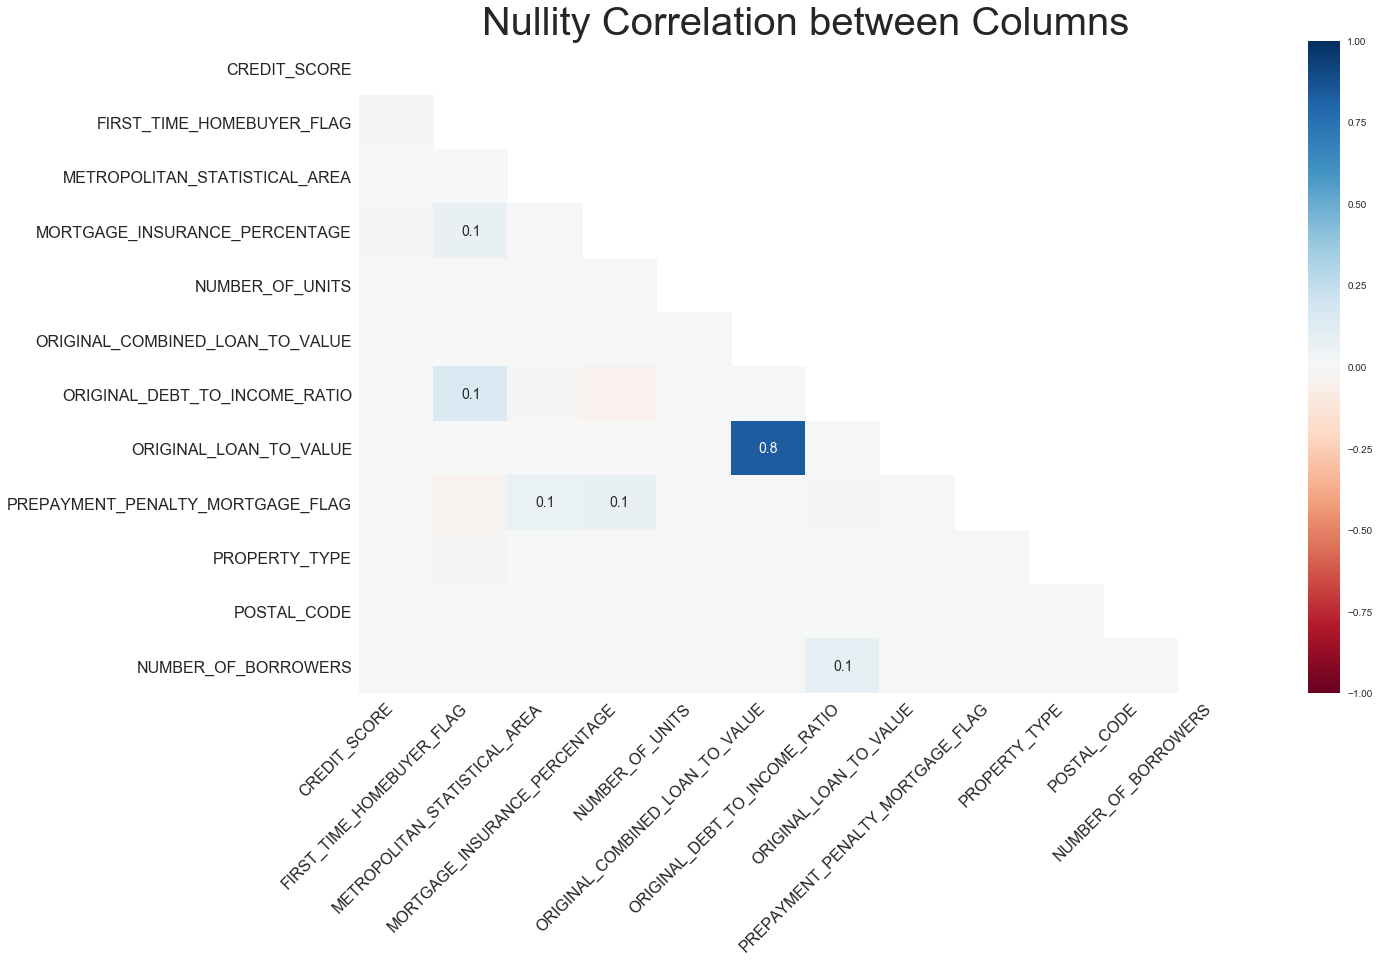

In [8]:
g = msno.heatmap(df)
g.axes.set_title("Nullity Correlation between Columns",fontsize=40);

This figure show that:

- There doesn't seem to be a strong correlation between columns for missing values, except for `ORIGINAL_COMBINED_LOAN_TO_VALUE` and `ORIGINAL_LOAN_TO_VALUE`.

This answers our third question.

To check for our second question, let's count the number of missing values in each column and make a table. For clarity, I removed the columns that contain 0 missing values

In [9]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,#Missing Values
CREDIT_SCORE,2711
FIRST_TIME_HOMEBUYER_FLAG,130559
METROPOLITAN_STATISTICAL_AREA,70149
MORTGAGE_INSURANCE_PERCENTAGE,51048
NUMBER_OF_UNITS,3
ORIGINAL_COMBINED_LOAN_TO_VALUE,13
ORIGINAL_DEBT_TO_INCOME_RATIO,14929
ORIGINAL_LOAN_TO_VALUE,9
PREPAYMENT_PENALTY_MORTGAGE_FLAG,5178
PROPERTY_TYPE,95


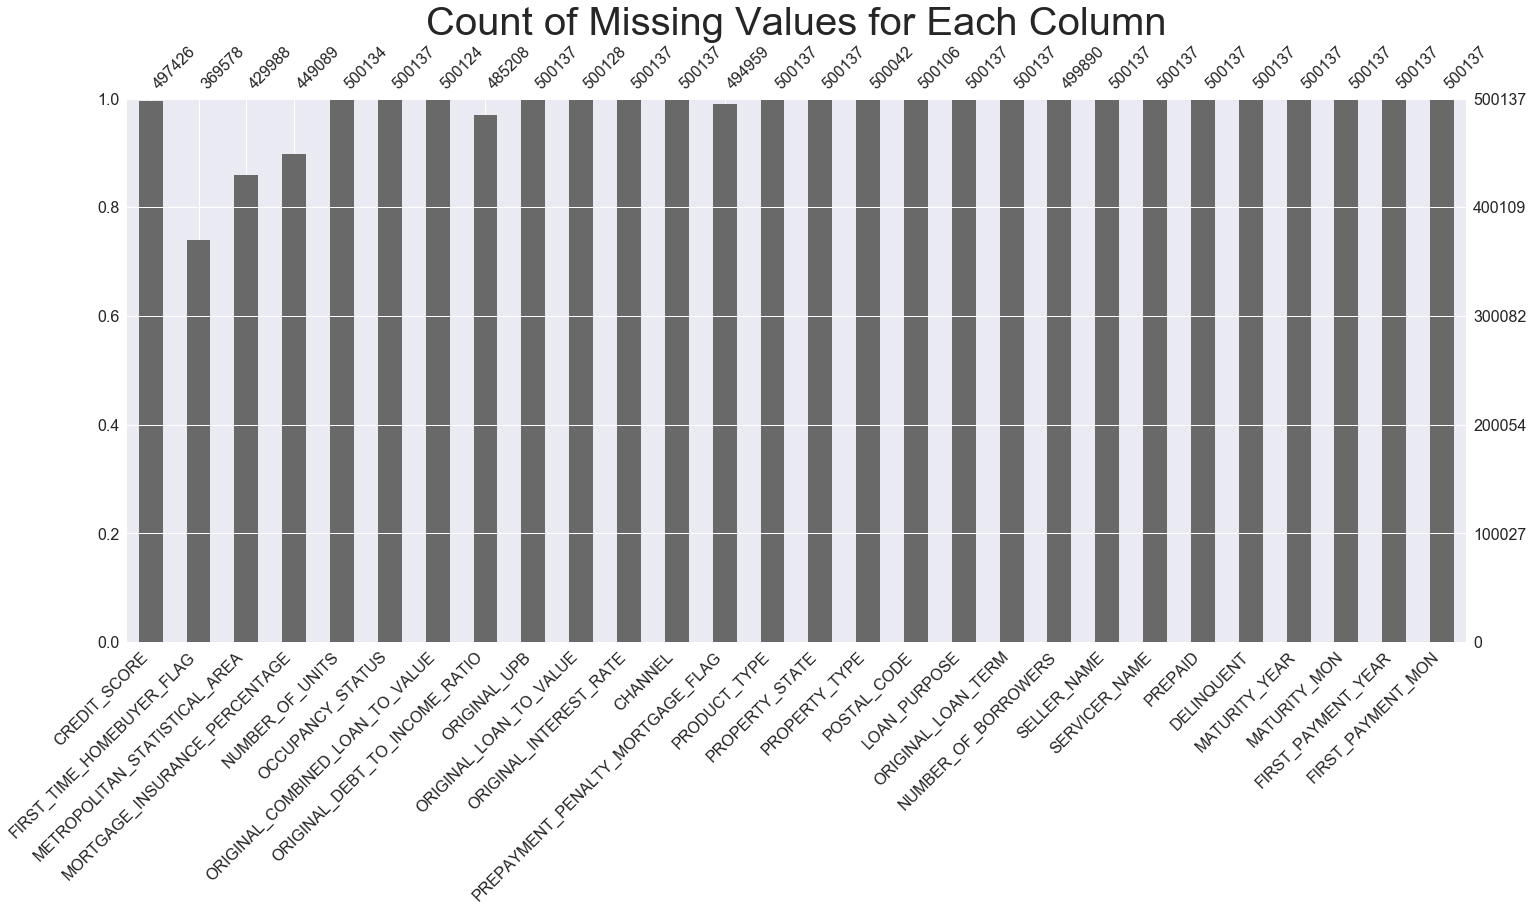

In [10]:
g = msno.bar(df);
g.set_title("Count of Missing Values for Each Column",fontsize=40);

This answers our second question.

Now that we know our problem space, we can go ahead and fill in the missing values. In the process of filling the data, I will also split our data set into a train and test set that will be useful to us later on in the machine learning portion of the tutorial.

In [11]:
train, test, encoder = get_train_test_split_for_ml(df,2000,True,True)

In [12]:
joined_filled_df = pd.concat((train,test))
missing_count_df = pd.DataFrame(joined_filled_df.isna().sum(),columns=["#Missing Values"])
missing_count_df[(missing_count_df.T != 0).any()]

,#Missing Values


As we can see, there are no more missing values in our data set. Now we are ready for some serious data science action.

## EDA

Exploratory Data Analysis (EDA) is the initial process of combing through a dataset to try and find patterns and make hypotheses that you might have about the data. EDA is important because it gives you more context about the data you are handling and may give you more ideas about what you can do with the data in the future. We chose to create a correlation matrix as part of our EDA. 


The matrix below is a Spearman correlation matrix that showcases the correlation values between each variable included in the dataset. In the matrix below, the darker boxes represent variables that are highly correlated with each other. The lighter blue and green boxes are less correlated variables. The lighter yellow/cream colored boxes represent variables that are negatively correlated. We chose to take a closer look at these more correlated variables in our Hypothesis testing. 


[Text(0, 0.5, 'CREDIT_SCORE'),
 Text(0, 1.5, 'METROPOLITAN_STATISTICAL_AREA'),
 Text(0, 2.5, 'MORTGAGE_INSURANCE_PERCENTAGE'),
 Text(0, 3.5, 'NUMBER_OF_UNITS'),
 Text(0, 4.5, 'ORIGINAL_COMBINED_LOAN_TO_VALUE'),
 Text(0, 5.5, 'ORIGINAL_DEBT_TO_INCOME_RATIO'),
 Text(0, 6.5, 'ORIGINAL_UPB'),
 Text(0, 7.5, 'ORIGINAL_LOAN_TO_VALUE'),
 Text(0, 8.5, 'ORIGINAL_INTEREST_RATE'),
 Text(0, 9.5, 'POSTAL_CODE'),
 Text(0, 10.5, 'ORIGINAL_LOAN_TERM'),
 Text(0, 11.5, 'NUMBER_OF_BORROWERS'),
 Text(0, 12.5, 'PREPAID'),
 Text(0, 13.5, 'DELINQUENT'),
 Text(0, 14.5, 'MATURITY_YEAR'),
 Text(0, 15.5, 'MATURITY_MON'),
 Text(0, 16.5, 'FIRST_PAYMENT_YEAR'),
 Text(0, 17.5, 'FIRST_PAYMENT_MON')]

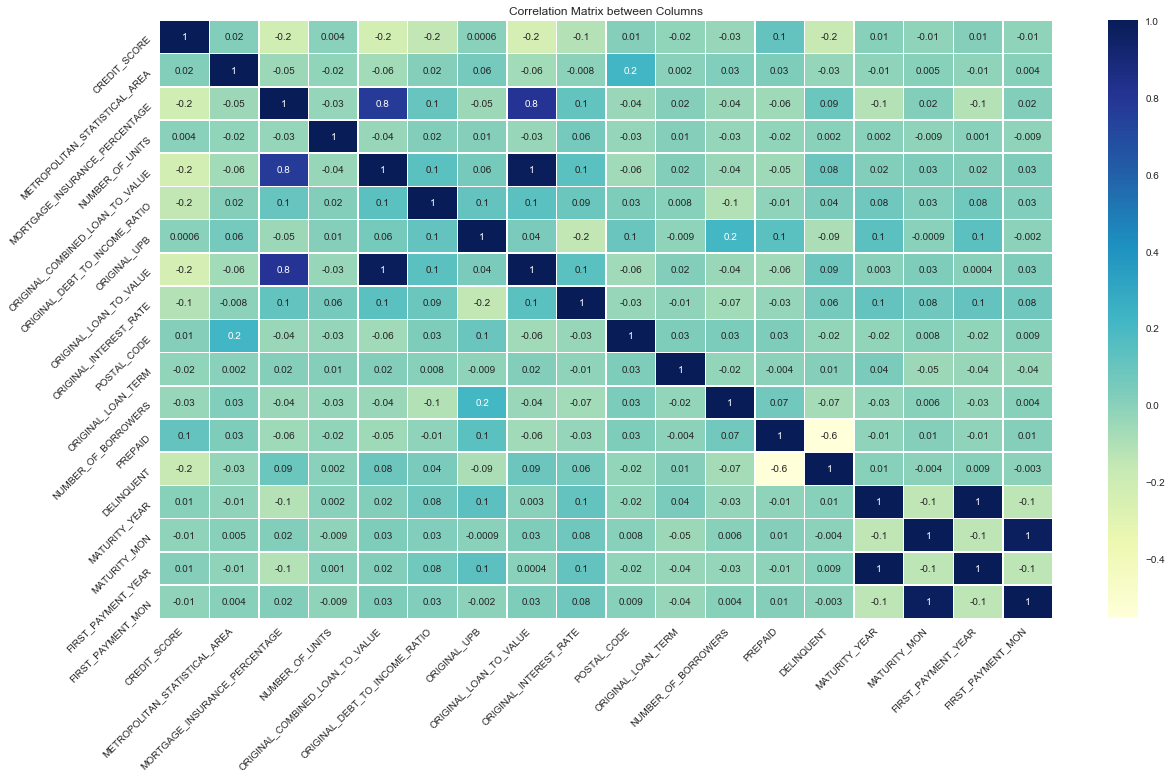

In [13]:
#Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr("spearman"), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

## Hypothesis Testing

Now its time for the hypothesis testing! But first, let us understand what hypothesis testing is. Hypothesis testing is a statistical method of determining if your created model is a good fit or not. As the name indicates, in hypothesis testing you will have two hypotheses: a null hypothesis and an alternative hypothesis. You want to set up your hypothesis such that you reject the null hypothesis. What does it mean to reject the hypothesis though? This is where significance level comes into the picture. When setting up your experiment, in addition to the hypotheses, you set a significance level. If the p value of your random varaiable in within your siginficance level, also known as the rejection level, you reject the null hypothesis. While determining whether to reject your null hypothesis or not, be careful to determine what type of test you are setting up; is it one-tailed or two-tailed?

Let's look at an example now. In our example we will be looking to see if there is a linear correlation between credit score, originial combined loan to value, original UPB, originial loan to value, original interest rate, mortgage insurarnce percentage, number of borrowers, prepayment and delinquency. Since the variable that we are trying to predict is categorical (it can take two values 1 or True and 0 or False) we will be using a logistic regression instead of linear regression.

Before we run the test we must set up our hypotheses and the significance level:

$\alpha = 0.05$

$H_{o} = $ There is no linearity between the variables and delinquency

$H_{a} = $ There is linearity between the variables and delinquency

To be able to run a logistic regression, we need to encode our boolean predictor with 1's and 0's. For this example, we will encode True (i.e a loan is delinquent) as 1 and False (i.e a loan is not delinquent) as 0.

In [14]:
df['DELINQUENT_ENCODING'] = [1 if i else 0 for i in df['DELINQUENT']]
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT,MATURITY_YEAR,MATURITY_MON,FIRST_PAYMENT_YEAR,FIRST_PAYMENT_MON,DELINQUENT_ENCODING
LOAN_SEQUENCE_NUMBER,,,,,,,,,,,,,,,,,,,,,
F199Q1000004,669.0,N,NaN,0.0,1.0,O,80.0,33.0,162000,80.0,...,2.0,Other sellers,Other servicers,True,0,2029,1,2002,6,0
F199Q1000005,732.0,N,17140.0,0.0,1.0,O,25.0,10.0,53000,25.0,...,1.0,Other sellers,Other servicers,True,0,2029,3,1999,4,0
F199Q1000007,679.0,N,15940.0,30.0,1.0,O,91.0,48.0,133000,91.0,...,1.0,Other sellers,Other servicers,True,0,2029,2,2002,8,0
F199Q1000013,721.0,N,38060.0,0.0,1.0,O,39.0,13.0,174000,39.0,...,2.0,Other sellers,Other servicers,True,0,2029,2,2002,9,0
F199Q1000015,618.0,N,10420.0,25.0,1.0,O,85.0,24.0,122000,85.0,...,2.0,Other sellers,Other servicers,True,0,2029,2,2002,10,0


Below is the code to run logistic regression. The variables I chose for the formula are based on the correlation heat map from earlier. I chose the variables that had a high (above 0.5) correlation with delinquency.

In [15]:
reg = logit('DELINQUENT_ENCODING ~ CREDIT_SCORE + ORIGINAL_COMBINED_LOAN_TO_VALUE + ORIGINAL_UPB + ORIGINAL_LOAN_TO_VALUE + ORIGINAL_INTEREST_RATE + MORTGAGE_INSURANCE_PERCENTAGE + NUMBER_OF_BORROWERS', df).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.139754
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     DELINQUENT_ENCODING   No. Observations:               446305
Model:                           Logit   Df Residuals:                   446297
Method:                            MLE   Df Model:                            7
Date:                 Sun, 24 May 2020   Pseudo R-squ.:                  0.1355
Time:                         12:36:17   Log-Likelihood:                -62373.
converged:                        True   LL-Null:                       -72150.
Covariance Type:             nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.3417      0.157     27.621      0.000       4.034       4.650
CREDIT_SCORE                       -0.0127      0.000    -97.625      0.000      -0.013      -0.012
ORIGINAL_COMBINED_LOAN_TO_VALUE    -0.0455      0.006     -7.794      0.000      -0.057      -0.034
ORIGINAL_UPB                    -8.106e-06   1.69e-07    -47.992      0.000   -8.44e-06   -7.78e-06
ORIGINAL_LOAN_TO_VALUE              0.0705      0.006     11.755      0.000       0.059       0.082
ORIGINAL_INTEREST_RATE              0.1568      0.012     12.853      0.000       0.133       0.181
MORTGAGE_INSURANCE_PERCENTAGE       0.0033      0.001      3.373      0.001       0.001       0.005
NUMBER_OF_BORROWERS                -0.6155      0.017    -36.884      0.000      -0.648      -0.583
===================================================================================================
"""

After running the logistic regression, we can now see the coefficients for all the variables in our formula and their p values. According to the summary table, the p value for every variable is 0 which is within our rejection level. Therefore, we would reject the null hypothesis that there is no linear correlation between the variables and delinquency.

## Machine Learning

Now we are onto the machine learning component. We decided to run a logistic regression instead of something like a linear regression because we were trying to predict the categorical variable of delinquency. Categorical variables are better predicted using a logistic regression over a linear regression.

The following is the code used to run the logistic regression followed by some analysis of our model.

In [18]:
stat_sig_cols = ["CREDIT_SCORE","ORIGINAL_COMBINED_LOAN_TO_VALUE","ORIGINAL_UPB","ORIGINAL_LOAN_TO_VALUE","ORIGINAL_INTEREST_RATE","MORTGAGE_INSURANCE_PERCENTAGE","NUMBER_OF_BORROWERS"]

#Sampling our data for our Logistic Regression due to computational constraints
df = df.sample(10000)

In [19]:
def get_roc_data(model, cv_obj):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X[train], y[train])
        scores = model.predict_proba(X[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y[test],scores)
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])
        
        aucs.append(sklearn.metrics.auc(fpr, tpr))
        
    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0
    
    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df, model

In [20]:
#Logistic Regression Prep
cv_obj = sklearn.model_selection.StratifiedKFold(n_splits=10)

lr = sklearn.linear_model.LogisticRegression(n_jobs = -1)
parameters = {}

lr_cv = sklearn.model_selection.GridSearchCV(lr, parameters, cv=10)

In [21]:
#Using Function from clean_data script to split into testing and training data
train,test, _ = get_train_test_split_for_ml(df, 2000,pre_process=True )

In [22]:
#Removing attributes
X = train[stat_sig_cols].to_numpy()
y = train["DELINQUENT"]

In [23]:
lr_curve_df, lr_auc_df, trained_model = get_roc_data(lr_cv, cv_obj)

lr_curve_df['model'] = 'logistic regression'
lr_auc_df['model'] = 'logistic regression'

A confusion matrix was produced after running our testing data against our logistic regression model to see what kind of results we would get. A confusion matrix is a 2x2 table that shows us the following values: True Positive, False Positive, True Negative and False Negative. These values are indicative of whether the model correctly or incorrectly predicted a delinquent or non-delinquent person.

True Positive: Correctly predicted a Delinquent

False Positive: Incorrectly Predicted a Delinquent

True Negative: Correctly predicted a non-Delinquent

False Negative: Incorrectly Predicted a non-Delinquent

Confusion Matrix : 
 [[4706    2]
 [ 217    0]]


Text(0.5, 1, 'Confusion Matrix on the Test Data')

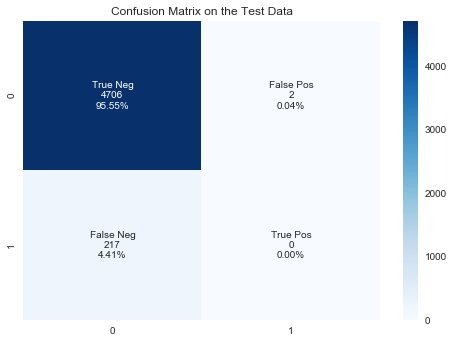

In [24]:
#Generating the Confusion Matrix using our test data
from sklearn.metrics import confusion_matrix

X = test[stat_sig_cols].to_numpy()
y = test["DELINQUENT"]

scores = trained_model.predict_proba(X)[:,1]
scores = [1 if i > 0.5 else 0 for i in scores]

cf_matrix = confusion_matrix(y, scores)
print ("Confusion Matrix : \n", cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
        zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
g = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
g.set_title("Confusion Matrix on the Test Data")

> Note: as you can see that our data was really baised toward postive which as moved to our model.

From these values we can evaluate the strength of our logistic regression model by calculating the Error Rate, Accuracy, Sensitivity and Specificity

In [25]:
tn, fp, fn, tp = cf_matrix.ravel()

pd.DataFrame(cf_matrix.ravel(),index=["TN","FP","FN","TP"],columns=["CM Values"])

,CM Values
TN,4706
FP,2
FN,217
TP,0


Error Rate: This model has a low error rate which is good. This means that it has a very small chance of predicting an incorrect outcome.

Accuracy: When a model has a low error rate, it typically has a high accuracy rate which means that it correctly predicts the outcome of our testing data most of the time. Our model is very accurate.

Specificity: This model is highly specific. This means that our model high a high amount of correct negative predictions.

Sensitivity: This model has a very poor sensitivity. This means that it has a very low amount of correct positive predictions. We think that we did not get any true positives from our model because of the overwhelming amounts on non-delinquent data we used to build the model. A way we could possibly improve this is by changing our sample to include more delinquent data.

In [26]:
#Evaluation of Confusion Matrix
total = (tn + fp + fn + tp)

#Error Rate:
er = (fp + fn) / total

#Accuracy:
acc = (tp + tn) / total

#Sensitivity
sens = tp / (tp + fp)

#Specificity
spec = tn / (tn + fn)


pd.DataFrame((er, acc, sens, spec),index=["Error Rate","Accuracy","Sensitivity","Specificity"],columns=["Metrics"])

,Metrics
Error Rate,0.044467
Accuracy,0.955533
Sensitivity,0.000000
Specificity,0.955921


Lets move onto a visual respresentation of our model. The following is our ROC data and our AUROC curve

In [27]:
#ROC data
lr_curve_df

,fpr,tpr,model
0,0.000000,0.000000,logistic regression
1,0.010101,0.079044,logistic regression
2,0.020202,0.127574,logistic regression
3,0.030303,0.177206,logistic regression
4,0.040404,0.189706,logistic regression
...,...,...,...
95,0.959596,0.994118,logistic regression
96,0.969697,1.000000,logistic regression
97,0.979798,1.000000,logistic regression
98,0.989899,1.000000,logistic regression


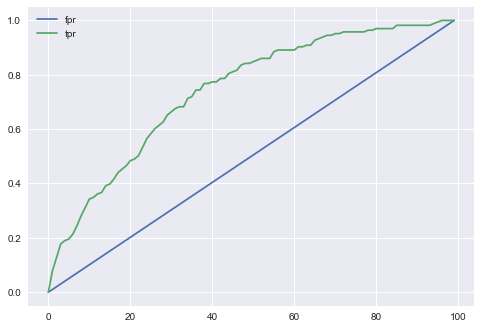

In [28]:
#Plot of ROC Curve
lr_curve_df.plot.line()

In our AUROC Curve, we see two lines. The line at 45 degrees symbolizes using a 50-50 approach of guessing whether someone was delinquent or not. The green line above this 45-degree line is our logistic regression model. The greater the y-value, the more accurate the model is at predicting whether someone is delinquent. A perfect model would have a consistent y-value of 1. We can deduce from this graph that our logistic regression model is quite a bit better at predicting whether someone is delinquent than just random guessing.

Text(0.5, 1.0, 'Feature Importance by all X Columns')

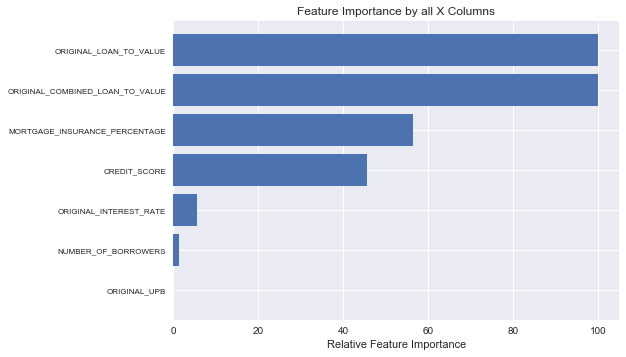

In [29]:
feature_importance = abs(trained_model.best_estimator_.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance,)
pos = np.arange(sorted_idx.shape[0]) + .5

X_cols = np.array(stat_sig_cols)
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center',)
featax.set_yticks(pos)
featax.set_yticklabels(X_cols[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
featax.set_title("Feature Importance by all X Columns")

This figure shows the impact of each coefficient in the model. We can see that for the most predictive x var logistic regression the `ORIGINAL_LOAN_TO_VALUE` and `ORIGINAL_COMBINED_LOAN_TO_VALUE` had the most impact in the model followed by `CREDIT_SCORE` and `MORTGAGE_INSURANCE_PERCENTAGE`.

It also seem that the `ORIGINAL_UPB` isn't super impactful so you could probably drop that.

## Conclusion

So when determining whether someone is would be delinquent or not we should look at the credit score and loan value. however, as the loans gets larger and credit score gets larger it is hard to determine delinquency.

In our hypothesis testing we said that we picked variables based on how correlated they were based on our correlation matrix. Since all those variables resulted in a p_value of less than 0.05, they were all deemed to be significant variables for our models. If one or more of those variables were over the significance value of 0.05 then we would have run another logistic regression excluding those variables and would compare the AUROC curves of both models.

I hope that seeing a data science pipeline from data processing ➡ EDA ➡ hypothesis testing ➡ ML and analysis has given you some insight into how you can leverage data. 

To learn more about a given topic check the following links:

- [Data processing](https://medium.com/better-programming/data-engineering-101-from-batch-processing-to-streaming-54f8c0da66fb)

- [EDA] (https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9)

- [Hypothesis testing intuition](https://towardsdatascience.com/hypothesis-testing-the-what-why-and-how-867d382b99ca)

- [Hypothesis testing](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)

- [ML articles gold mine](https://medium.com/machine-learning-in-practice/over-200-of-the-best-machine-learning-nlp-and-python-tutorials-2018-edition-dd8cf53cb7dc)

All of our code for this project can be found at [Github repo](https://github.com/Rajashow/hippity-hoppity-your-data-is-my-property)  

[Dataset](https://www.kaggle.com/saravananselvamohan/freddie-mac-singlefamily-loanlevel-dataset)

Check out Further EDA at [EDA](https://rajashow.github.io/hippity-hoppity-your-data-is-my-property/Freddie%20Mac%20Single%20Family%20Loan%20EDA%20Report.html)